In [2]:
import pandas as pd
import geopandas as gpd

### January 2020

### Read PM2.5 data

In [3]:
d1=pd.read_csv("C:/Users/rajpa/Desktop/New folder month/jan_2020.csv",encoding= 'unicode_escape')
d1 = gpd.GeoDataFrame(d1,geometry = gpd.points_from_xy(d1['longitude'],d1['latitude']))
d1.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,longitude,geometry
0,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2020-01-30T18:30:00+00:00,31-01-2020,T00:00:00+05:30,49.00,Âµg/mÂ³,12.951913,77.539784,POINT (77.53978 12.95191)
1,6975,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-01-30T18:30:00+00:00,31-01-2020,T00:00:00+05:30,51.00,Âµg/mÂ³,12.917348,77.622813,POINT (77.62281 12.91735)
2,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2020-01-30T18:30:00+00:00,31-01-2020,T00:00:00+05:30,70.68,Âµg/mÂ³,12.935205,77.681449,POINT (77.68145 12.93520)
3,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2020-01-30T18:30:00+00:00,31-01-2020,T00:00:00+05:30,56.32,Âµg/mÂ³,13.027020,77.494094,POINT (77.49409 13.02702)
4,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2020-01-30T18:30:00+00:00,31-01-2020,T00:00:00+05:30,46.00,Âµg/mÂ³,12.920984,77.584908,POINT (77.58491 12.92098)


### Change coordinate refrence system

In [4]:
d1=d1.set_crs('epsg:4326')
d1=d1.to_crs('epsg:32643')
d1.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Plot locations from which have data collected

<AxesSubplot:>

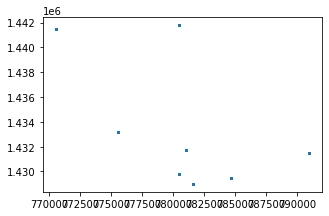

In [5]:
d1.plot(markersize=1.5,figsize=(5,5))

### Create Buffer around every location

<AxesSubplot:>

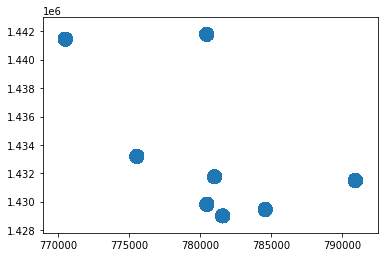

In [6]:
d1['geometry'] = d1.geometry.buffer(500)
d1.plot()

### Read LST value zonal statistics file

In [7]:
d2=gpd.read_file("C:/Users/rajpa/Desktop/Final datset/CSV _Zonal_statistics_files/zonal_202001.GeoJson")

d2.head()

,id,left,top,right,bottom,_mean,_min,_max,geometry
0,1,766696.557282,1.454692e+06,766796.557282,1.454592e+06,34.085041,33.796983,34.358619,"POLYGON ((766696.557 1454691.820, 766796.557 1..."
1,2,766696.557282,1.454592e+06,766796.557282,1.454492e+06,33.933047,33.595186,34.192391,"POLYGON ((766696.557 1454591.820, 766796.557 1..."
2,3,766696.557282,1.454492e+06,766796.557282,1.454392e+06,34.733097,34.338612,35.074933,"POLYGON ((766696.557 1454491.820, 766796.557 1..."
3,4,766696.557282,1.454392e+06,766796.557282,1.454292e+06,34.922917,34.613127,35.131737,"POLYGON ((766696.557 1454391.820, 766796.557 1..."
4,5,766696.557282,1.454292e+06,766796.557282,1.454192e+06,34.152223,33.689453,34.626598,"POLYGON ((766696.557 1454291.820, 766796.557 1..."


### Spatial join of PM2.5 values of January 2019 and Zonal statistics of LST raster file values

In [8]:
January2020_spatial_join= gpd.sjoin(d1,d2, how='inner')
January2020_spatial_join.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,...,geometry,index_right,id,left,top,right,bottom,_mean,_min,_max
0,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2020-01-30T18:30:00+00:00,31-01-2020,T00:00:00+05:30,49.0,Âµg/mÂ³,12.951913,...,"POLYGON ((776052.297 1433187.477, 776049.889 1...",30407,30408,775396.557282,1.432892e+06,775496.557282,1.432792e+06,32.074387,31.778164,32.324281
10,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2020-01-30T18:15:00+00:00,30-01-2020,T23:45:00+05:30,49.0,Âµg/mÂ³,12.951913,...,"POLYGON ((776052.297 1433187.477, 776049.889 1...",30407,30408,775396.557282,1.432892e+06,775496.557282,1.432792e+06,32.074387,31.778164,32.324281
17,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2020-01-30T18:00:00+00:00,30-01-2020,T23:30:00+05:30,48.0,Âµg/mÂ³,12.951913,...,"POLYGON ((776052.297 1433187.477, 776049.889 1...",30407,30408,775396.557282,1.432892e+06,775496.557282,1.432792e+06,32.074387,31.778164,32.324281
22,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2020-01-30T17:45:00+00:00,30-01-2020,T23:15:00+05:30,48.0,Âµg/mÂ³,12.951913,...,"POLYGON ((776052.297 1433187.477, 776049.889 1...",30407,30408,775396.557282,1.432892e+06,775496.557282,1.432792e+06,32.074387,31.778164,32.324281
32,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2020-01-30T17:30:00+00:00,30-01-2020,T23:00:00+05:30,48.0,Âµg/mÂ³,12.951913,...,"POLYGON ((776052.297 1433187.477, 776049.889 1...",30407,30408,775396.557282,1.432892e+06,775496.557282,1.432792e+06,32.074387,31.778164,32.324281


### Save the file in the csv format

In [10]:
January2020_spatial_join.to_csv("C:/Users/rajpa/Desktop/final_JOIN/January2020_spatial_join.csv")

### February 2020

In [4]:
d1=pd.read_csv("C:/Users/rajpa/Desktop/New folder month/feb_2020.csv",encoding= 'unicode_escape')
d1 = gpd.GeoDataFrame(d1,geometry = gpd.points_from_xy(d1['longitude'],d1['latitude']))
d1.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,longitude,geometry
0,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2020-02-01T00:00:00+00:00,01-02-2020,T05:30:00+05:30,46.00,Âµg/mÂ³,12.920984,77.584908,POINT (77.58491 12.92098)
1,6983,"Hombegowda Nagar, Bengaluru - KSPCB",Bengaluru,IN,2020-02-01T00:00:00+00:00,01-02-2020,T05:30:00+05:30,68.00,Âµg/mÂ³,12.938539,77.590100,POINT (77.59010 12.93854)
2,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2020-02-01T00:00:00+00:00,01-02-2020,T05:30:00+05:30,47.04,Âµg/mÂ³,12.935205,77.681449,POINT (77.68145 12.93520)
3,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2020-02-01T00:00:00+00:00,01-02-2020,T05:30:00+05:30,45.76,Âµg/mÂ³,12.913522,77.595080,POINT (77.59508 12.91352)
4,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2020-02-01T00:00:00+00:00,01-02-2020,T05:30:00+05:30,41.11,Âµg/mÂ³,13.027020,77.494094,POINT (77.49409 13.02702)


In [5]:
d1=d1.set_crs('epsg:4326')
d1=d1.to_crs('epsg:32643')
d1.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

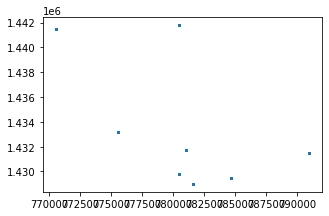

In [6]:
d1.plot(markersize=1.5,figsize=(5,5))

<AxesSubplot:>

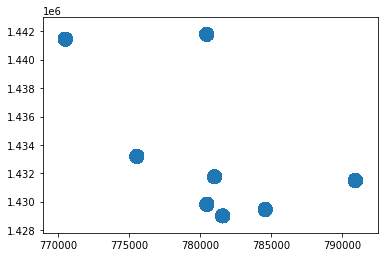

In [7]:
d1['geometry'] = d1.geometry.buffer(500)
d1.plot()

In [9]:
d2=gpd.read_file("C:/Users/rajpa/Desktop/Final datset/CSV _Zonal_statistics_files/zonal_202002.GeoJson")

d2.head()

,id,left,top,right,bottom,_mean,_min,_max,geometry
0,1,766696.557282,1.454692e+06,766796.557282,1.454592e+06,33.997077,33.797123,34.279893,"POLYGON ((766696.557 1454691.820, 766796.557 1..."
1,2,766696.557282,1.454592e+06,766796.557282,1.454492e+06,33.809504,33.619347,34.073838,"POLYGON ((766696.557 1454591.820, 766796.557 1..."
2,3,766696.557282,1.454492e+06,766796.557282,1.454392e+06,34.548905,34.152430,34.870605,"POLYGON ((766696.557 1454491.820, 766796.557 1..."
3,4,766696.557282,1.454392e+06,766796.557282,1.454292e+06,34.624959,34.203059,34.917915,"POLYGON ((766696.557 1454391.820, 766796.557 1..."
4,5,766696.557282,1.454292e+06,766796.557282,1.454192e+06,33.701261,33.268160,34.195067,"POLYGON ((766696.557 1454291.820, 766796.557 1..."


In [10]:
February2020_spatial_join= gpd.sjoin(d1,d2, how='inner')
February2020_spatial_join.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,...,geometry,index_right,id,left,top,right,bottom,_mean,_min,_max
0,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2020-02-01T00:00:00+00:00,01-02-2020,T05:30:00+05:30,46.0,Âµg/mÂ³,12.920984,...,"POLYGON ((780985.582 1429813.152, 780983.174 1...",47784,47785,780396.557282,1.430192e+06,780496.557282,1.430092e+06,28.864358,28.536993,29.160022
11,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2020-02-01T00:15:00+00:00,01-02-2020,T05:45:00+05:30,46.0,Âµg/mÂ³,12.920984,...,"POLYGON ((780985.582 1429813.152, 780983.174 1...",47784,47785,780396.557282,1.430192e+06,780496.557282,1.430092e+06,28.864358,28.536993,29.160022
20,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2020-02-01T00:30:00+00:00,01-02-2020,T06:00:00+05:30,54.0,Âµg/mÂ³,12.920984,...,"POLYGON ((780985.582 1429813.152, 780983.174 1...",47784,47785,780396.557282,1.430192e+06,780496.557282,1.430092e+06,28.864358,28.536993,29.160022
25,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2020-02-01T00:45:00+00:00,01-02-2020,T06:15:00+05:30,54.0,Âµg/mÂ³,12.920984,...,"POLYGON ((780985.582 1429813.152, 780983.174 1...",47784,47785,780396.557282,1.430192e+06,780496.557282,1.430092e+06,28.864358,28.536993,29.160022
37,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2020-02-01T01:00:00+00:00,01-02-2020,T06:30:00+05:30,54.0,Âµg/mÂ³,12.920984,...,"POLYGON ((780985.582 1429813.152, 780983.174 1...",47784,47785,780396.557282,1.430192e+06,780496.557282,1.430092e+06,28.864358,28.536993,29.160022


In [11]:
February2020_spatial_join.to_csv("C:/Users/rajpa/Desktop/final_JOIN/February2020_spatial_join.csv")

### March 2020

In [19]:
d1=pd.read_csv("C:/Users/rajpa/Desktop/New folder month/march_2020.csv",encoding= 'unicode_escape')
d1 = gpd.GeoDataFrame(d1,geometry = gpd.points_from_xy(d1['longitude'],d1['latitude']))
d1.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,longitude,geometry
0,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2020-01-30T18:30:00+00:00,31-01-2020,T00:00:00+05:30,49.00,Âµg/mÂ³,12.951913,77.539784,POINT (77.53978 12.95191)
1,6975,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-01-30T18:30:00+00:00,31-01-2020,T00:00:00+05:30,51.00,Âµg/mÂ³,12.917348,77.622813,POINT (77.62281 12.91735)
2,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2020-01-30T18:30:00+00:00,31-01-2020,T00:00:00+05:30,70.68,Âµg/mÂ³,12.935205,77.681449,POINT (77.68145 12.93520)
3,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2020-01-30T18:30:00+00:00,31-01-2020,T00:00:00+05:30,56.32,Âµg/mÂ³,13.027020,77.494094,POINT (77.49409 13.02702)
4,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2020-01-30T18:30:00+00:00,31-01-2020,T00:00:00+05:30,46.00,Âµg/mÂ³,12.920984,77.584908,POINT (77.58491 12.92098)


In [20]:
d1=d1.set_crs('epsg:4326')
d1=d1.to_crs('epsg:32643')
d1.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

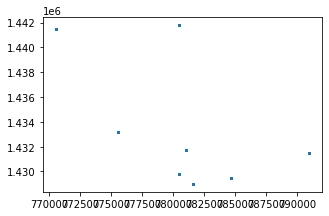

In [21]:
d1.plot(markersize=1.5,figsize=(5,5))

<AxesSubplot:>

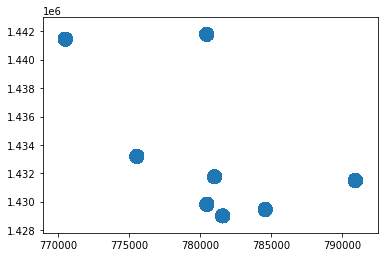

In [22]:
d1['geometry'] = d1.geometry.buffer(500)
d1.plot()

In [ ]:
d2=gpd.read_file("C:/Users/rajpa/Desktop/Final datset/CSV _Zonal_statistics_files/zonal_202003.GeoJson")

d2.head()

### May 2020

In [12]:
d1=pd.read_csv("C:/Users/rajpa/Desktop/New folder month/may_2020.csv",encoding= 'unicode_escape')
d1 = gpd.GeoDataFrame(d1,geometry = gpd.points_from_xy(d1['longitude'],d1['latitude']))
d1.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,longitude,geometry
0,6975,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-05-01T00:00:00+00:00,01-05-2020,T05:30:00+05:30,20.00,Âµg/mÂ³,12.917348,77.622813,POINT (77.62281 12.91735)
1,6984,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2020-05-01T00:00:00+00:00,01-05-2020,T05:30:00+05:30,22.00,Âµg/mÂ³,13.029152,77.585901,POINT (77.58590 13.02915)
2,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2020-05-01T00:15:00+00:00,01-05-2020,T05:45:00+05:30,21.35,Âµg/mÂ³,12.913522,77.595080,POINT (77.59508 12.91352)
3,6975,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-05-01T00:15:00+00:00,01-05-2020,T05:45:00+05:30,25.00,Âµg/mÂ³,12.917348,77.622813,POINT (77.62281 12.91735)
4,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2020-05-01T00:15:00+00:00,01-05-2020,T05:45:00+05:30,35.98,Âµg/mÂ³,13.027020,77.494094,POINT (77.49409 13.02702)


In [13]:
d1=d1.set_crs('epsg:4326')
d1=d1.to_crs('epsg:32643')
d1.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

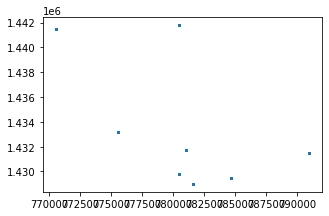

In [14]:
d1.plot(markersize=1.5,figsize=(5,5))

<AxesSubplot:>

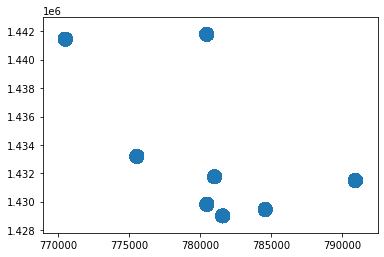

In [15]:
d1['geometry'] = d1.geometry.buffer(500)
d1.plot()

In [16]:
d2=gpd.read_file("C:/Users/rajpa/Desktop/Final datset/CSV _Zonal_statistics_files/zonal_202005.GeoJson")

d2.head()

,id,left,top,right,bottom,_mean,_min,_max,geometry
0,1,766696.557282,1.454692e+06,766796.557282,1.454592e+06,31.454232,30.881182,31.798776,"POLYGON ((766696.557 1454691.820, 766796.557 1..."
1,2,766696.557282,1.454592e+06,766796.557282,1.454492e+06,31.114465,30.588385,31.523774,"POLYGON ((766696.557 1454591.820, 766796.557 1..."
2,3,766696.557282,1.454492e+06,766796.557282,1.454392e+06,31.329490,30.631243,31.843012,"POLYGON ((766696.557 1454491.820, 766796.557 1..."
3,4,766696.557282,1.454392e+06,766796.557282,1.454292e+06,31.824296,31.499485,31.985858,"POLYGON ((766696.557 1454391.820, 766796.557 1..."
4,5,766696.557282,1.454292e+06,766796.557282,1.454192e+06,31.382184,30.950658,31.870122,"POLYGON ((766696.557 1454291.820, 766796.557 1..."


In [17]:
may2020_spatial_join= gpd.sjoin(d1,d2, how='inner')
may2020_spatial_join.head()

,locationId,location,city,country,utc,date,time,value,unit,latitude,...,geometry,index_right,id,left,top,right,bottom,_mean,_min,_max
0,6975,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-05-01T00:00:00+00:00,01-05-2020,T05:30:00+05:30,20.0,Âµg/mÂ³,12.917348,...,"POLYGON ((785105.320 1429452.534, 785102.912 1...",62019,62020,784496.557282,1.429392e+06,784596.557282,1.429292e+06,27.546176,27.400486,27.882203
3,6975,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-05-01T00:15:00+00:00,01-05-2020,T05:45:00+05:30,25.0,Âµg/mÂ³,12.917348,...,"POLYGON ((785105.320 1429452.534, 785102.912 1...",62019,62020,784496.557282,1.429392e+06,784596.557282,1.429292e+06,27.546176,27.400486,27.882203
12,6975,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-05-01T01:00:00+00:00,01-05-2020,T06:30:00+05:30,25.0,Âµg/mÂ³,12.917348,...,"POLYGON ((785105.320 1429452.534, 785102.912 1...",62019,62020,784496.557282,1.429392e+06,784596.557282,1.429292e+06,27.546176,27.400486,27.882203
15,6975,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-05-01T01:15:00+00:00,01-05-2020,T06:45:00+05:30,19.0,Âµg/mÂ³,12.917348,...,"POLYGON ((785105.320 1429452.534, 785102.912 1...",62019,62020,784496.557282,1.429392e+06,784596.557282,1.429292e+06,27.546176,27.400486,27.882203
22,6975,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-05-01T02:00:00+00:00,01-05-2020,T07:30:00+05:30,19.0,Âµg/mÂ³,12.917348,...,"POLYGON ((785105.320 1429452.534, 785102.912 1...",62019,62020,784496.557282,1.429392e+06,784596.557282,1.429292e+06,27.546176,27.400486,27.882203


In [19]:
may2020_spatial_join.to_csv("C:/Users/rajpa/Desktop/final_JOIN/May2020_spatial_join.csv")